# Customer Personality Analysis

<b>Customer personality analysis is a detailed 
analysis of the company’s ideal customers. It helps the 
companies to better understand the needs of the customers 
and lets the company focus on recommending the right 
products to the right customers.<br><br>
How exactly can segmentation benefit the business?
1. Breaking down a large customer base into multiple groups makes it easier to identify the target audience.<br>
2. Determines new market opportunities – might happen while doing segmentation.<br>
3. Customer retention – Identify groups that require extra attention, along with the customers with the highest potential value.


<b>Importing all the necessary libraries</b>

In [64]:
import pandas as pd
import numpy as np
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)

In [65]:
df = pd.read_csv('marketing_campaign.csv', sep='\t')    #Reading the CSV file into a dataframe.

In [66]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [67]:
df.columns    #Lists out all the columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [68]:
df.info()    #The info() method prints all the information about the dataframe. It tells how many non-null values are there and also the datatypes of every feature.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

<b>We see that the income column contains only 2216 non-null records meaning that there are some null records in the income column. That is why we drop those rows which have a null value in the column.</b>

In [69]:
df = df.dropna()

In [70]:
df.shape

(2216, 29)

<b>The plotly Python library is an interactive, open-source plotting library that supports over 40 unique chart types covering a wide range of statistical, financial, geographic, scientific, and 3-dimensional use-cases.</b>

In [71]:
import plotly.express as px
import plotly.graph_objects as go

<b>We see that the date column 'Dt_Customer' is in the form of strings. So, we convert it to a datetime object.</b>

In [72]:
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"])
dates = []
for i in df["Dt_Customer"]:
    i = i.date()
    dates.append(i)

<b>We are subtracting today's date from the dates that are mentioned in the 'Dt_Customer' column. This gives us information about how long the customer is associated with the company. After that, we convert that to a numeric form so that we could use it for further processing.</b>

In [73]:
days = []
for i in dates:
    delta = datetime.date.today() - i
    days.append(delta)
df["Customer_For"] = days
df["Customer_For"] = pd.to_numeric(df["Customer_For"], errors="coerce")

In [74]:
df['Marital_Status'].value_counts()

Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

<b> We see that the 'Marital Status' column has got many distinct values and thus, we reduce it and make a new column called 'Living With'.</b>

In [75]:
df["Living_With"]=df["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone",})

In [76]:
df['Education'].value_counts()

Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64

<b>We do the same with the 'Education' column.</b>

In [77]:
df["Education"]=df["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

<b>We create a new column 'Age' with the help of 'Year Birth' column.<b>

In [78]:
df['Age'] = 2021 - df['Year_Birth']

In [79]:
df['Age'].mean()

52.17960288808664

<b>We combine all the columns which has information about money spent into one single column.

In [80]:
df["Spent"] = df["MntWines"]+ df["MntFruits"]+ df["MntMeatProducts"]+ df["MntFishProducts"]+ df["MntSweetProducts"]+ df["MntGoldProds"]

In [81]:
df['Spent'].mean()

607.0753610108303

<b>The dataset has got information about how many kids and teenagers are there. So, we combine it to one single column.

In [82]:
df['children'] = df['Kidhome'] + df['Teenhome']

In [83]:
#Calculating family size.
df["Family_Size"] = df["Living_With"].replace({"Alone": 1, "Partner":2})+ df["children"]   

In [84]:
#We can find out how many customers are parents and how many are not.
df["Is_Parent"] = np.where(df.children> 0, 1, 0)

In [85]:
df['Is_Parent'].value_counts()

1    1583
0     633
Name: Is_Parent, dtype: int64

<b>We drop columns that are not needed anymore.

In [86]:
col_drop = ["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID"]

In [87]:
df = df.drop(col_drop,axis=1)

In [88]:
df.shape

(2216, 30)

<b>Pandas describe() is used to view some basic statistical details like percentile, mean, std etc. of a data frame or a series of numeric values.

In [89]:
df.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customer_For,Age,Spent,children,Family_Size,Is_Parent
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2.216000e+03,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,...,0.064079,0.013538,0.009477,0.150271,2.650757e+17,52.179603,607.075361,0.947202,2.592509,0.714350
std,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,...,0.244950,0.115588,0.096907,0.357417,2.008532e+16,11.985554,602.900476,0.749062,0.905722,0.451825
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,2.208384e+17,25.000000,5.000000,0.000000,1.000000,0.000000
25%,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,2.502144e+17,44.000000,69.000000,0.000000,2.000000,0.000000
50%,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,...,0.000000,0.000000,0.000000,0.000000,2.651616e+17,51.000000,396.500000,1.000000,3.000000,1.000000
75%,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,...,0.000000,0.000000,0.000000,0.000000,2.801088e+17,62.000000,1048.000000,1.000000,3.000000,1.000000
max,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,3.126816e+17,128.000000,2525.000000,3.000000,5.000000,1.000000


<b>Plotting the donut pie chart of the distribution of the 'Living With' column.

In [90]:
fig =  px.pie (df, names = "Living_With", hole = 0.3, template = "gridon")
fig.show()

<b>Plotting a histogram to see the distribution of age of customers.

In [91]:
fig = px.histogram(df,x='Age')
fig.show()

<b>Comparing the expenses of a parent vs non-parent

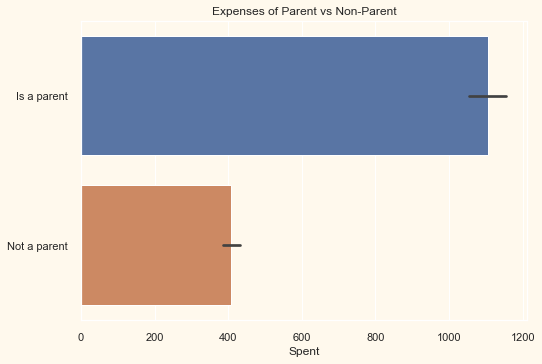

In [92]:
dict1 = {0:'Is a parent',1:'Not a parent'}
list1 = list(df['Is_Parent'])
for i in range(len(list1)):
    list1[i] = dict1[list1[i]]
sns.barplot(x = df['Spent'],y = list1);
plt.title('Expenses of Parent vs Non-Parent');

<b>Comparing the expenditure based on Education level

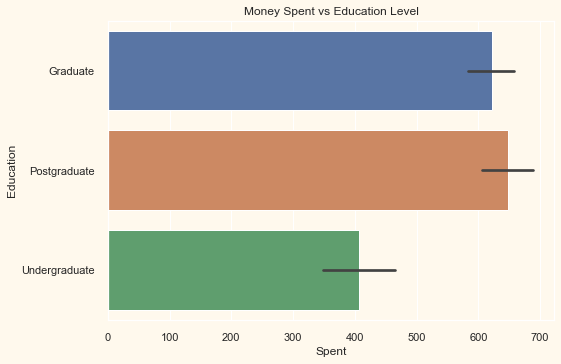

In [93]:
sns.barplot(x = df['Spent'],y = df['Education']);
plt.title('Money Spent vs Education Level');

<b>Relative Plot Of Some Selected Features: A Data Subset

<Figure size 576x396 with 0 Axes>

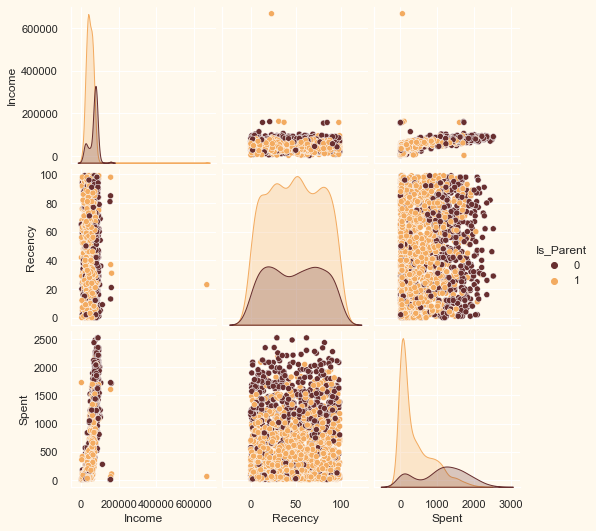

In [94]:
sns.set(rc={"axes.facecolor":"#FFF9ED","figure.facecolor":"#FFF9ED"})
pallet = ["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"]
cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])
To_Plot = [ "Income", "Recency", "Spent", "Is_Parent"]
plt.figure()
sns.pairplot(df[To_Plot], hue= "Is_Parent",palette= (["#682F2F","#F3AB60"]))
plt.show()

<b>Removing outliers. We noticed that the max age was 128 years. Also, we noticed some outliers in the income column as well. So, we are dropping those columns which have outliers.

In [95]:
df = df[(df["Age"]<90)]
df = df[(df["Income"]<600000)]

In [96]:
df.shape     #Checking the shape of the dataset after removing outliers.

(2212, 30)

<b>Plotting correlation matrix. It demonstrates the relationship between variables. Higher positive value indicates stronger relationship. Values near 0, positive or negative, indicate that the two variables are not related. High negative value indicates that it is inversely related.

<AxesSubplot:>

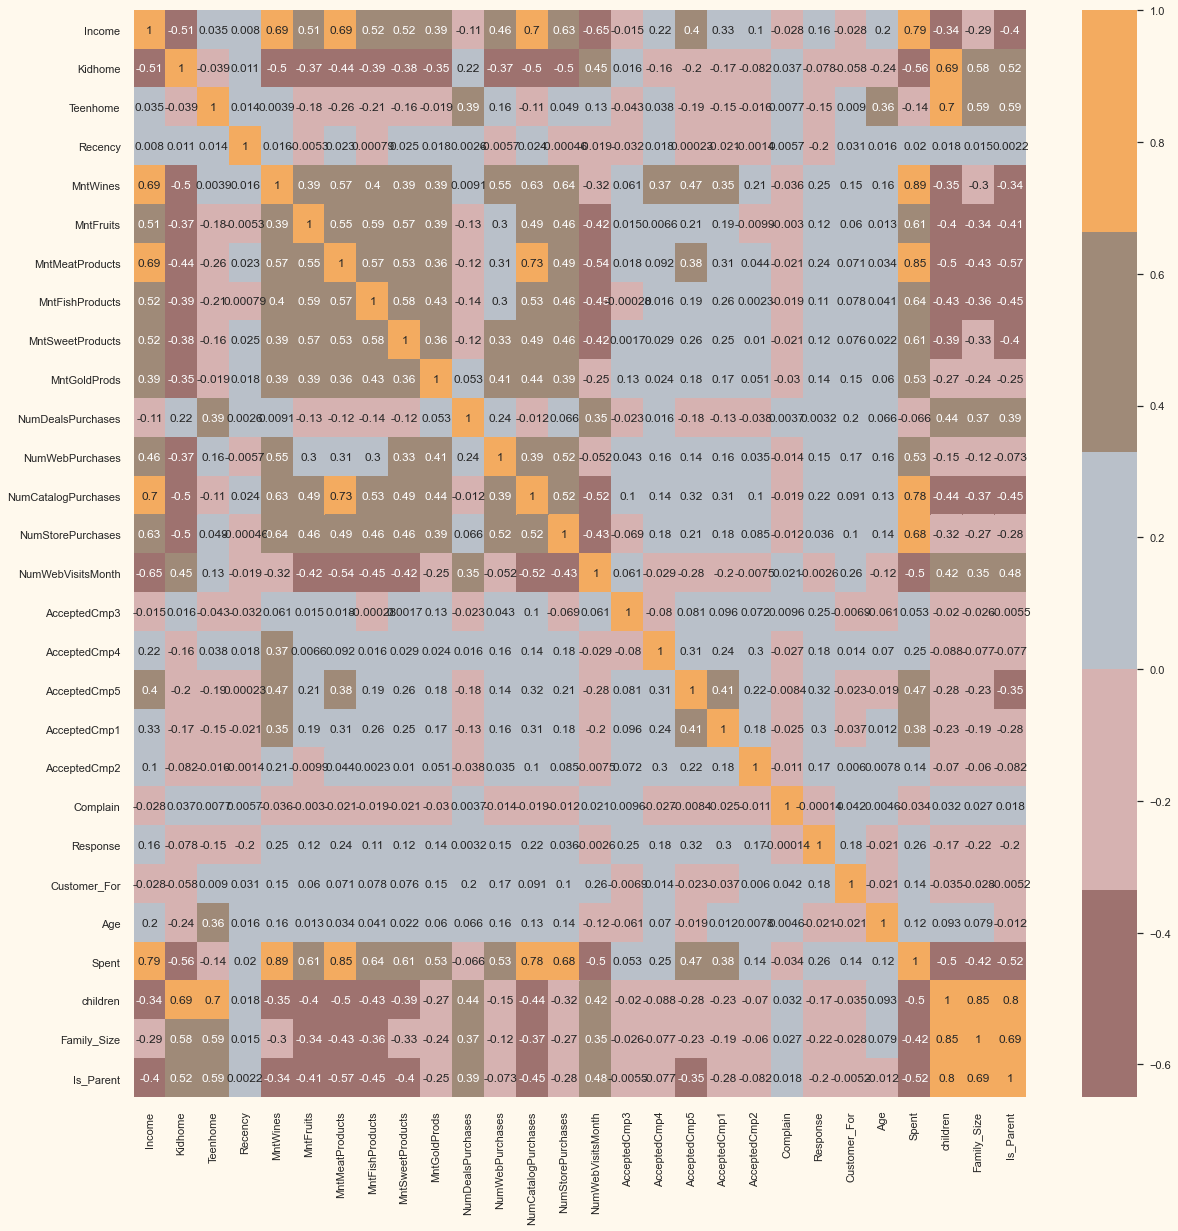

In [97]:
corrmat= df.corr()
plt.figure(figsize=(20,20))  
sns.heatmap(corrmat,annot=True, cmap=cmap, center=0)

<b>We notice that the columns 'Education' and 'Living_With' have categorical values. So, we need to convert them into numerical data. We use Label Encoder for that. It converts categorical data into integers like 0,1,2,3,etc.

In [98]:
LE = LabelEncoder()
df['Education']=df[['Education']].apply(LE.fit_transform)
df['Living_With']=df[['Living_With']].apply(LE.fit_transform)

<b>We see that the categorical values have been converted to 0,1,2.

In [99]:
df['Living_With'].value_counts()

1    1428
0     784
Name: Living_With, dtype: int64

In [100]:
df['Education'].value_counts()

0    1115
1     845
2     252
Name: Education, dtype: int64

In [101]:
ds = df.copy()            #We make a copy of the dataframe

In [102]:
#We drop some more columns that are not needed.
cols_del = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response']
ds = ds.drop(cols_del, axis=1)

<b>StandardScaler performs the task of Standardization. It is an important step because we want all our numerical data to be in a standard scale.

In [103]:
scaler = StandardScaler()
scaler.fit(ds)
scaled_ds = pd.DataFrame(scaler.transform(ds),columns= ds.columns)

<b>Principal Component Analysis, or PCA, is a dimensionality-reduction method that is often used to reduce the dimensionality of large data sets, by transforming a large set of variables into a smaller one that still contains most of the information in the large set.

<b>Our dataset previously had 23 columns. We reduce it to 3 columns, but that doesn't mean we've lost information. We have captured most of the information in these 3 columns.

In [104]:
pca = PCA(n_components=3)
pca.fit(scaled_ds)
PCA_ds = pd.DataFrame(pca.transform(scaled_ds), columns=(["col1","col2", "col3"]))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,2212.0,8.954059e-17,2.878377,-5.969389,-2.538494,-0.780421,2.383290,7.444307
col2,2212.0,2.981340e-17,1.706839,-4.312204,-1.328322,-0.158071,1.242285,6.142747
col3,2212.0,4.745551e-17,1.221952,-3.530662,-0.828196,-0.023646,0.799480,6.607513


In [105]:
PCA_ds_copy = PCA_ds.copy()

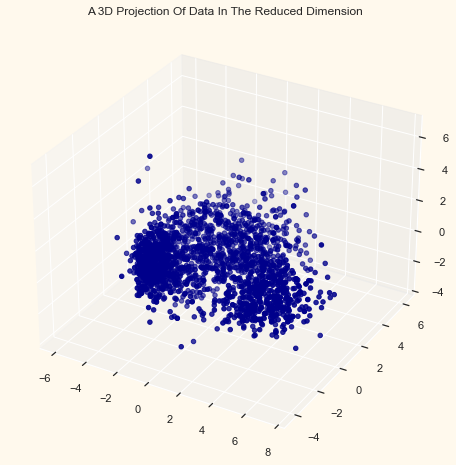

In [106]:
x =PCA_ds["col1"]
y =PCA_ds["col2"]
z =PCA_ds["col3"]
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="darkblue", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

In [107]:
import scipy.cluster.hierarchy as shc

<b>Dendrograms are a diagrammatic representation of the hierarchical relationship between the data-points. It illustrates the arrangement of the clusters produced by the corresponding analyses and is used to observe the output of hierarchical (agglomerative) clustering.

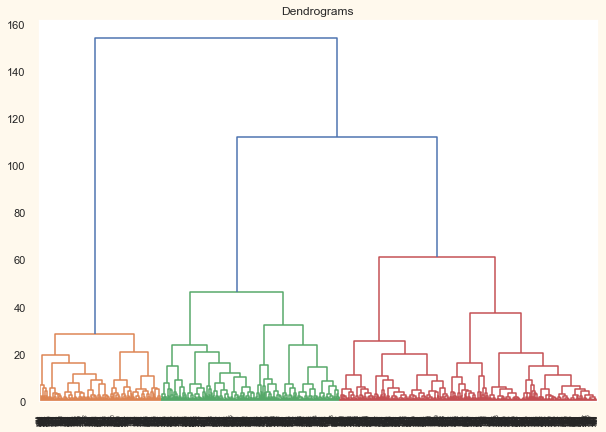

In [108]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(PCA_ds, method='ward'))

<b>We start building our model. We use agglomerative clustering to cluster the data points. From the above dendrogram, we decide to go ahead with the number of clusters as 4.

In [109]:
AC_model = AgglomerativeClustering(n_clusters=4)
pred1 = AC_model.fit_predict(PCA_ds)
PCA_ds["Clusters"] = pred1
df["Clusters"]= pred1

<b>0,1,2,3 are the different clusters. The value counts indicate how many data points belong to each cluster.

In [110]:
df['Clusters'].value_counts()

0    708
2    580
1    487
3    437
Name: Clusters, dtype: int64

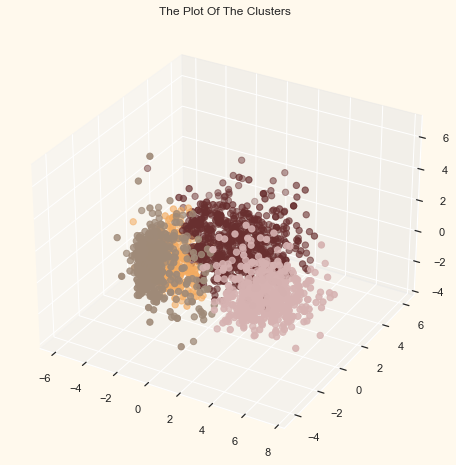

In [111]:
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_ds["Clusters"], marker='o', cmap = cmap )
ax.set_title("The Plot Of The Clusters")
plt.show()

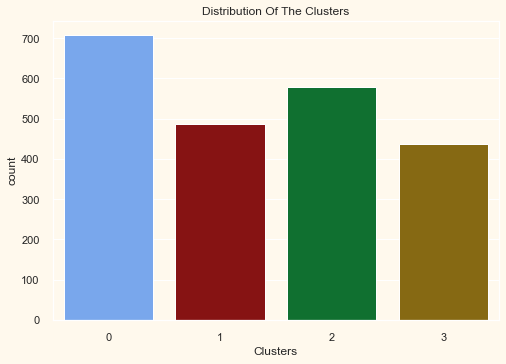

In [112]:
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
pl = sns.countplot(x=df["Clusters"], palette= ['#66a3ff','#990000','#00802b','#997300'])
pl.set_title("Distribution Of The Clusters")
plt.show()

<b>We plot the scatter plot of these data points against columns like 'Income' and 'Spent'. This gives us an idea of the buying behaviour of customers belonging to different clusters.

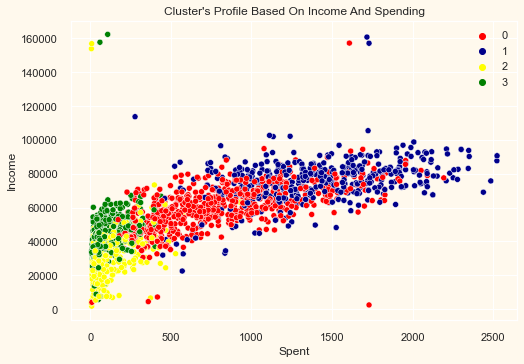

In [113]:
pl = sns.scatterplot(data = df,x=df["Spent"], y=df["Income"],hue=df["Clusters"], palette= ['red','darkblue','yellow','green'])
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

<b>What we infer from the above scatter plot is that:</b><br>
Cluster-0: high spending nature and average income<br>
Cluster-1: high spending nature and high income<br>
Cluster-2: low spending nature and low income<br>
Cluster-3: high spending nature and low income

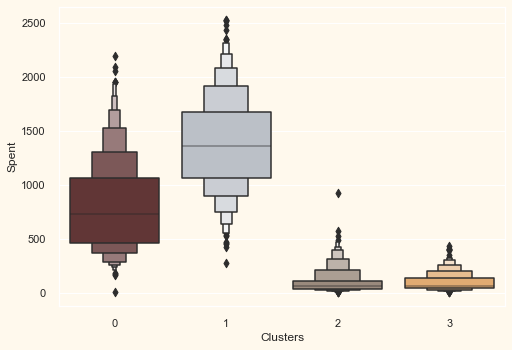

In [114]:
plt.figure()
pl=sns.boxenplot(x=df["Clusters"], y=df["Spent"], palette=pal)
plt.show()

<b>We have got different columns indicating how many promotions/offers were accepted by the customers in each campaign. So, we decided to combine all of these columns into one single column.

In [115]:
df["Total_Promos"] = df["AcceptedCmp1"]+ df["AcceptedCmp2"]+ df["AcceptedCmp3"]+ df["AcceptedCmp4"]+ df["AcceptedCmp5"]

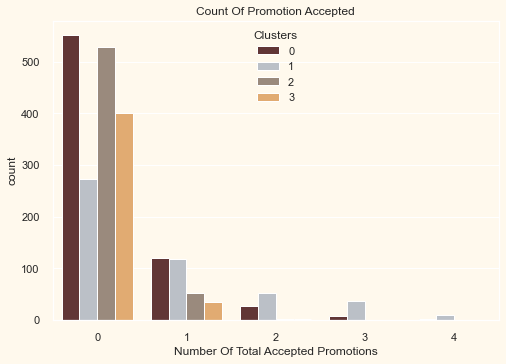

In [116]:
plt.figure()
pl = sns.countplot(x=df["Total_Promos"],hue=df["Clusters"], palette= pal)
pl.set_title("Count Of Promotion Accepted")
pl.set_xlabel("Number Of Total Accepted Promotions")
plt.show()

<b>We decided to build another model using K-Means Clustering and compare it with the Agglomerative Clustering model.

In [117]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score 
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score

<b>The Elbow Method is one of the most popular methods to determine this optimal value of k. The elbow method runs k-means clustering on the dataset for a range of values for k (say from 1-10) and then for each value of k computes an average score for all clusters. We decided to go ahead with the number of clusters, k as 4.

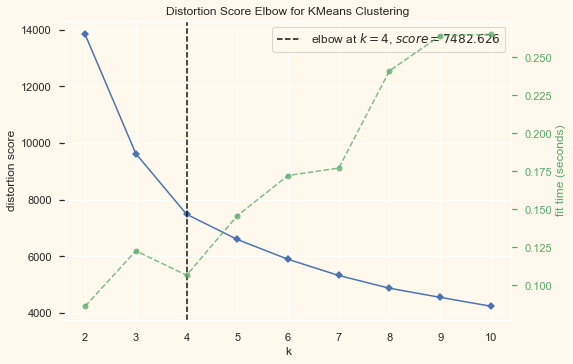

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [118]:
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_ds_copy)
Elbow_M.show()

In [119]:
from sklearn.metrics import silhouette_score

In [126]:
k_means_model = KMeans(n_clusters=4,random_state= 10)
pred2 = k_means_model.fit_predict(PCA_ds_copy)
score = silhouette_score(PCA_ds_copy,pred2)
PCA_ds_copy['Clusters'] = pred2
print('Silhouette score : ',score)

Silhouette score :  0.4665729808295703


In [121]:
PCA_ds_copy['Clusters'].value_counts()

1    611
0    555
3    540
2    506
Name: Clusters, dtype: int64

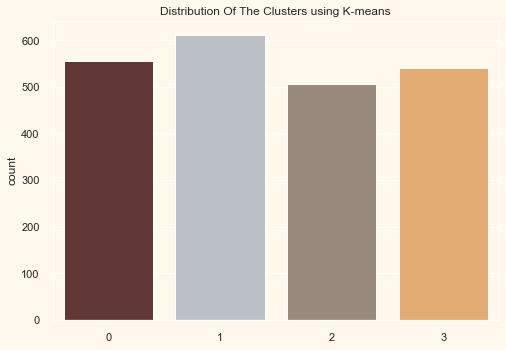

In [122]:
pl = sns.countplot(x=pred2, palette= pal)
pl.set_title("Distribution Of The Clusters using K-means")
plt.show()

<b>If we compare the distribution of data points across clusters using K-Means and Agglomerative Clustering, we see that there is a slight difference, but not that significant. So, we decided to go ahead with our initial Agglomerative model.

<b>Now, we look to find insights into the clusters that we generated. We would want to find out how one cluster is different from the other. And for that, we are going to be plotting joint plots comapring different features for each cluster.

<Figure size 576x396 with 0 Axes>

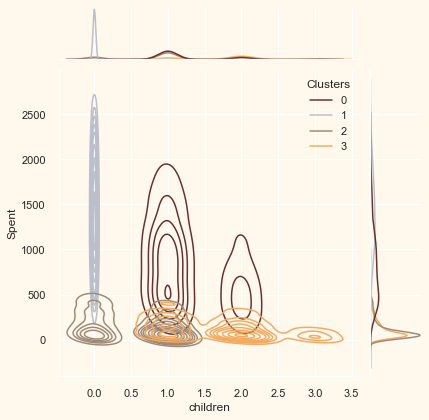

In [123]:
plt.figure()
sns.jointplot(x=df['children'], y=df["Spent"], hue =df["Clusters"], kind="kde", palette=pal)
plt.show()

<b>From the above plot, we see that Cluster-1 (depicted by grey color) lies in the region where it says 0 children. So, we can conclude that the customers belonging to Cluster-1 are definitely not parents. Also, we can say that customers in Cluster-0 and Cluster-3 are definitley parents.

<b>We are going to be considering the features/attributes listed below to get insights into the clusters.

In [124]:
features = ['Kidhome','Teenhome','Age','Family_Size','Is_Parent','Education','Living_With','Customer_For']

<Figure size 576x396 with 0 Axes>

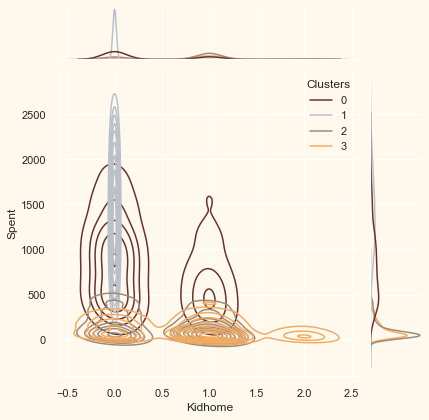

<Figure size 576x396 with 0 Axes>

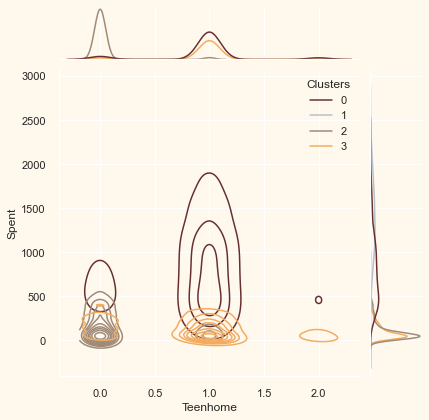

<Figure size 576x396 with 0 Axes>

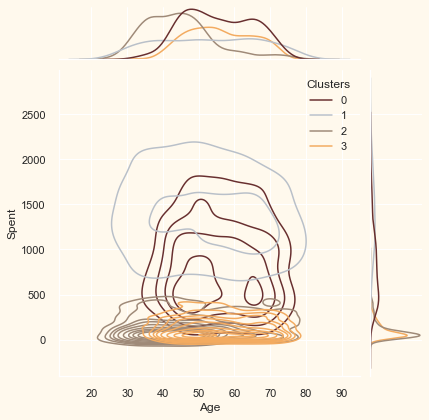

<Figure size 576x396 with 0 Axes>

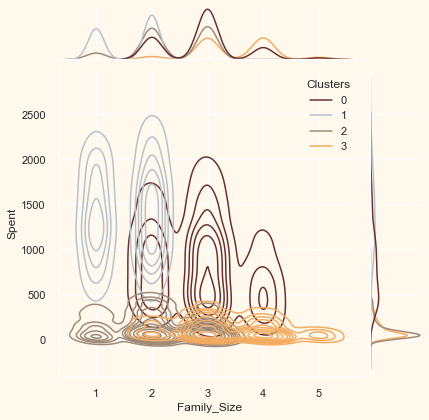

<Figure size 576x396 with 0 Axes>

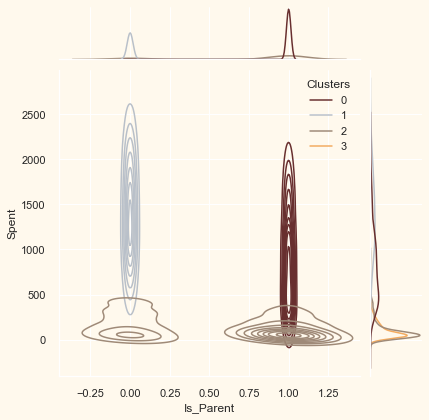

<Figure size 576x396 with 0 Axes>

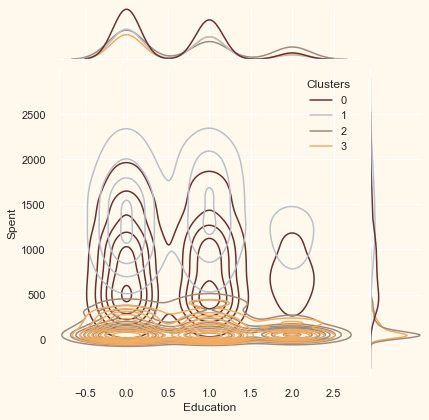

<Figure size 576x396 with 0 Axes>

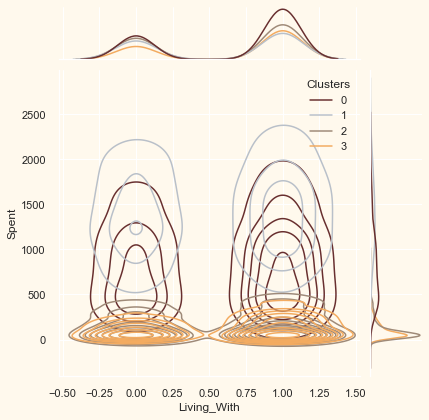

<Figure size 576x396 with 0 Axes>

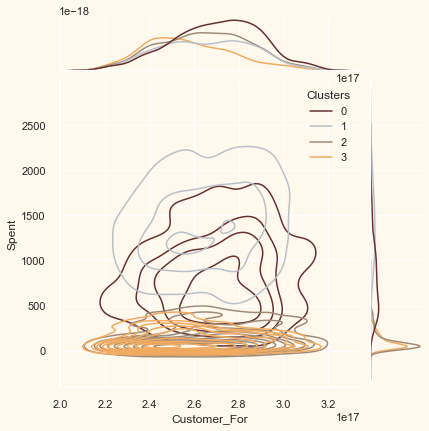

In [125]:
for feature in features:
    plt.figure()
    sns.jointplot(x=df[feature], y=df["Spent"], hue =df["Clusters"], kind="kde", palette=pal)
    plt.show()

<b>Conclusion:<br>
    Clustering is an unsupervised learning technique. We built two different models using Agglomerative clustering and K-Means clustering. We saw that the two models produced quite similar clusters and we decided to go ahead with Agglomerative Clustering. We saw how one cluster is different from the other and so on. This technique could prove to be very useful for businesses. It could be the baseline for a successful business strategy as businesses can focus on each cluster separately and bring in a business strategy that could be beneficial for everyone.